In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data set
aeiou = pd.read_csv('G:/Energy_Production_Dataset.csv', encoding='ISO-8859-1')

aeiou.head()

,Date,Start_Hour,End_Hour,Source,Day_of_Year,Day_Name,Month_Name,Season,Production
0,11/30/2025,21,22,Wind,334,Sunday,November,Fall,5281
1,11/30/2025,18,19,Wind,334,Sunday,November,Fall,3824
2,11/30/2025,16,17,Wind,334,Sunday,November,Fall,3824
3,11/30/2025,23,0,Wind,334,Sunday,November,Fall,6120
4,11/30/2025,6,7,Wind,334,Sunday,November,Fall,4387


In [3]:
#Get information about the dataset

pd.set_option('display.float_format', lambda x: '%.2f' % x)
aeiou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         51864 non-null  object
 1   Start_Hour   51864 non-null  int64 
 2   End_Hour     51864 non-null  int64 
 3   Source       51864 non-null  object
 4   Day_of_Year  51864 non-null  int64 
 5   Day_Name     51864 non-null  object
 6   Month_Name   51864 non-null  object
 7   Season       51864 non-null  object
 8   Production   51864 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ MB


In [4]:
# Check type of data

aeiou.info()

# Check for missing values

print(aeiou.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51864 entries, 0 to 51863
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         51864 non-null  object
 1   Start_Hour   51864 non-null  int64 
 2   End_Hour     51864 non-null  int64 
 3   Source       51864 non-null  object
 4   Day_of_Year  51864 non-null  int64 
 5   Day_Name     51864 non-null  object
 6   Month_Name   51864 non-null  object
 7   Season       51864 non-null  object
 8   Production   51864 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ MB
Date           0
Start_Hour     0
End_Hour       0
Source         0
Day_of_Year    0
Day_Name       0
Month_Name     0
Season         0
Production     0
dtype: int64


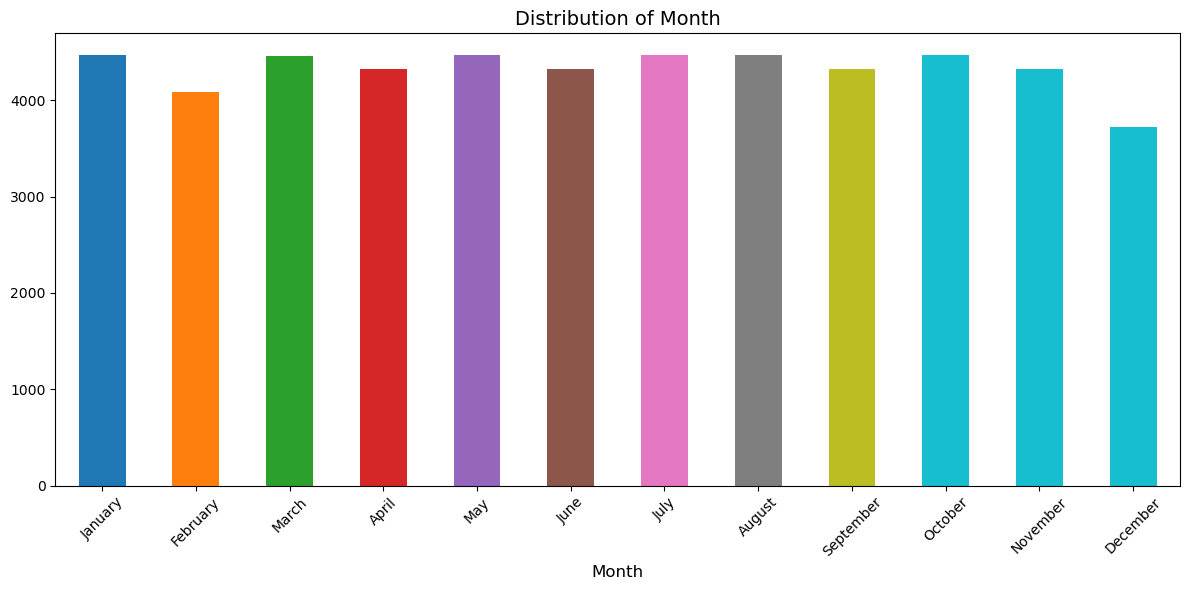

In [5]:
# Distribution by month
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

aeiou['Month_Name'] = pd.Categorical(
    aeiou['Month_Name'],
    categories = month_order,
    ordered = True )

count = aeiou['Month_Name'].value_counts().sort_index()

colors = plt.cm.tab10(range(len(count)))

plt.figure(figsize = (12, 6))  
count.plot(kind = 'bar', color = colors)

plt.xlabel('Month', fontsize = 12)
plt.title('Distribution of Month', fontsize = 14)
plt.xticks(rotation = 45 )  

plt.tight_layout()
plt.show()

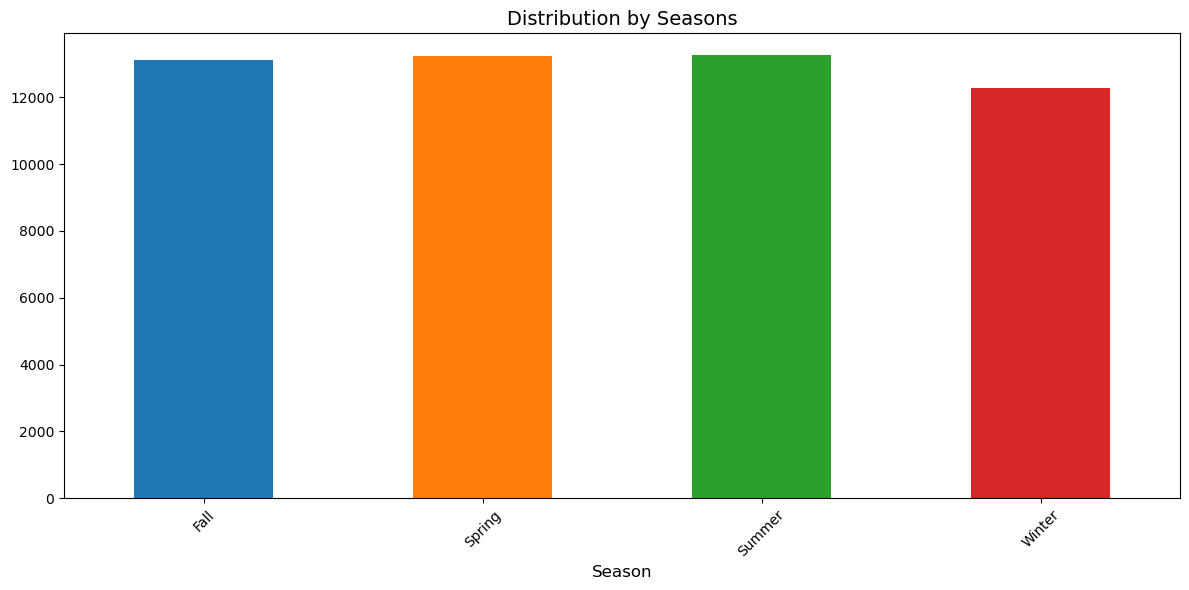

In [6]:
# Distribution by Season

count = aeiou['Season'].value_counts().sort_index()

colors = plt.cm.tab10(range(len(count)))

plt.figure(figsize = (12, 6))  
count.plot(kind = 'bar', color = colors)

plt.xlabel('Season', fontsize = 12)
plt.title('Distribution by Seasons', fontsize = 14)
plt.xticks(rotation = 45 )  

plt.tight_layout()
plt.show()

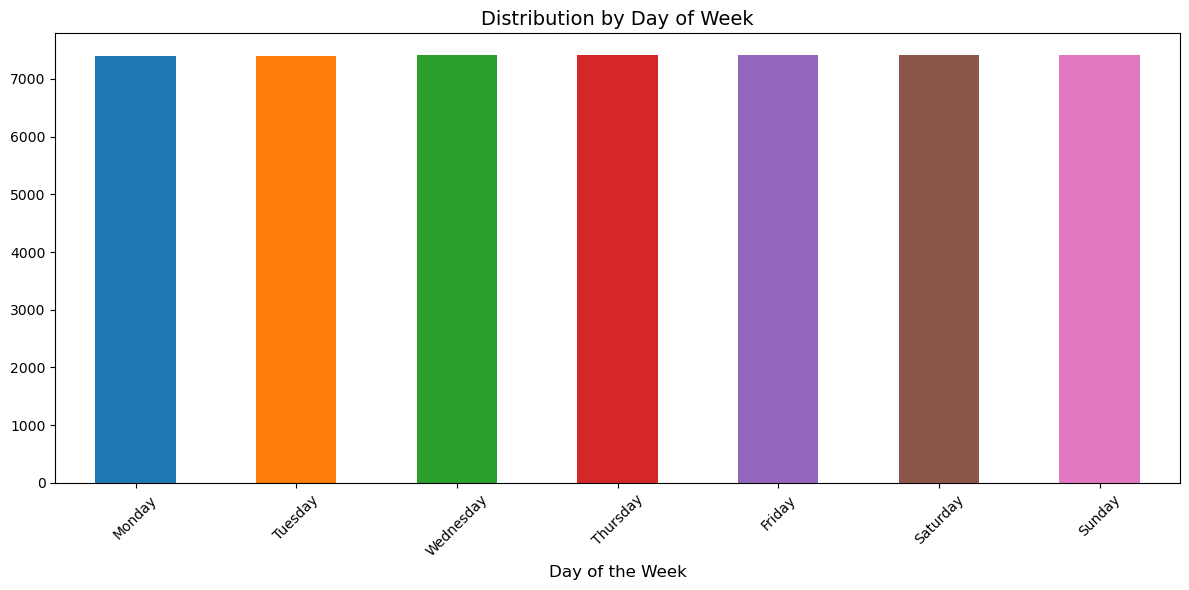

In [7]:
# Distribution by Day of the Week

day_order = [
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

aeiou['Day_Name'] = pd.Categorical(
    aeiou['Day_Name'],
    categories = day_order,
    ordered = True )

count = aeiou['Day_Name'].value_counts().sort_index()

colors = plt.cm.tab10(range(len(count)))

plt.figure(figsize = (12, 6))  
count.plot(kind = 'bar', color = colors)

plt.xlabel('Day of the Week', fontsize = 12)
plt.title('Distribution by Day of Week', fontsize = 14)
plt.xticks(rotation = 45 )  

plt.tight_layout()
plt.show()

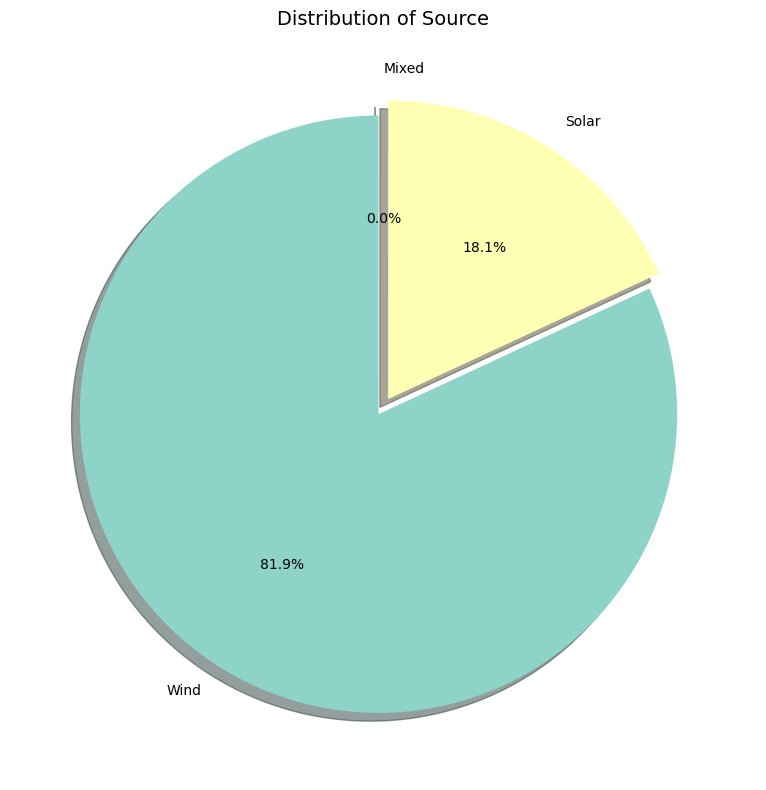

In [8]:
# Distribution by Source

sesosa = aeiou['Source'].value_counts()

colors = plt.cm.Set3(range(len(sesosa)))
explode = [0.03] * len(sesosa)

plt.figure(figsize = (8, 8))

plt.pie( sesosa,
    labels = sesosa.index,
    autopct = '%1.1f%%',
    colors = colors,
    explode = explode,
    shadow = True,
    startangle = 90 )

plt.title('Distribution of Source', fontsize = 14)
plt.tight_layout()
plt.show()



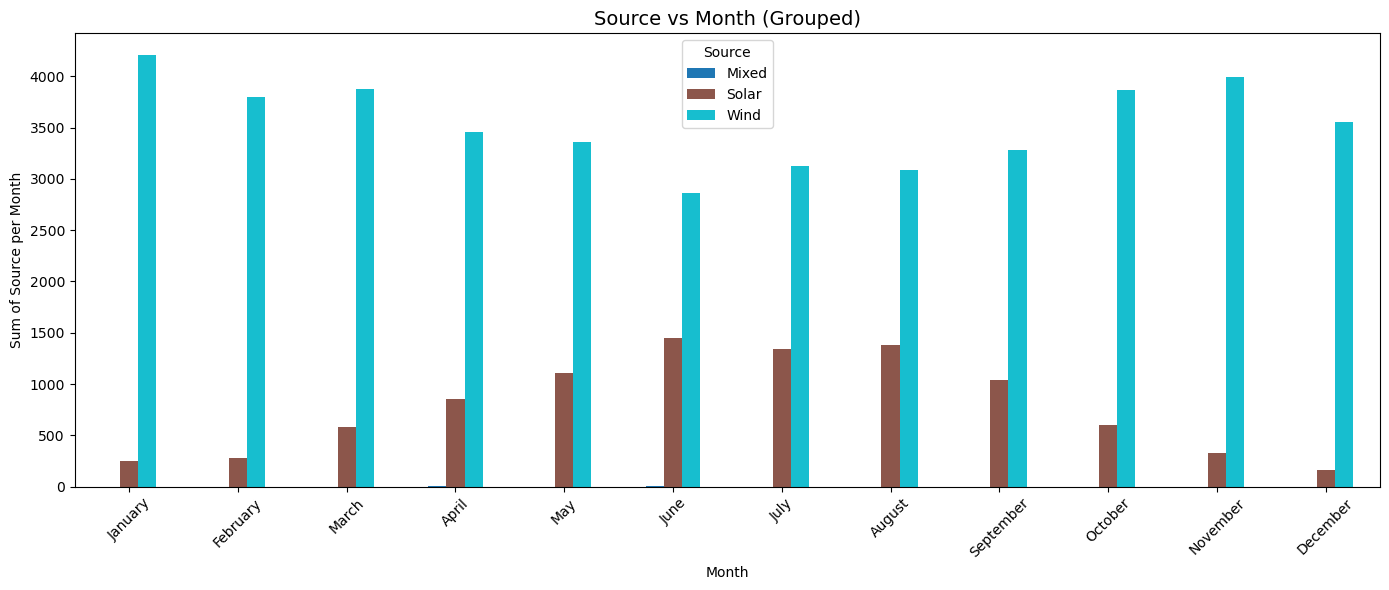

In [9]:
# Compare Source vs Month

month_order = [ 'January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December' ]

aeiou['Month_Name'] = pd.Categorical(
    aeiou['Month_Name'],
    categories = month_order,
    ordered = True )

pivot = pd.crosstab(aeiou['Month_Name'], aeiou['Source'])

pivot.plot( kind = 'bar',
    stacked = False,
    figsize = (14, 6),
    colormap = 'tab10' )

plt.title('Source vs Month (Grouped)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Sum of Source per Month')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.tight_layout()
plt.show()

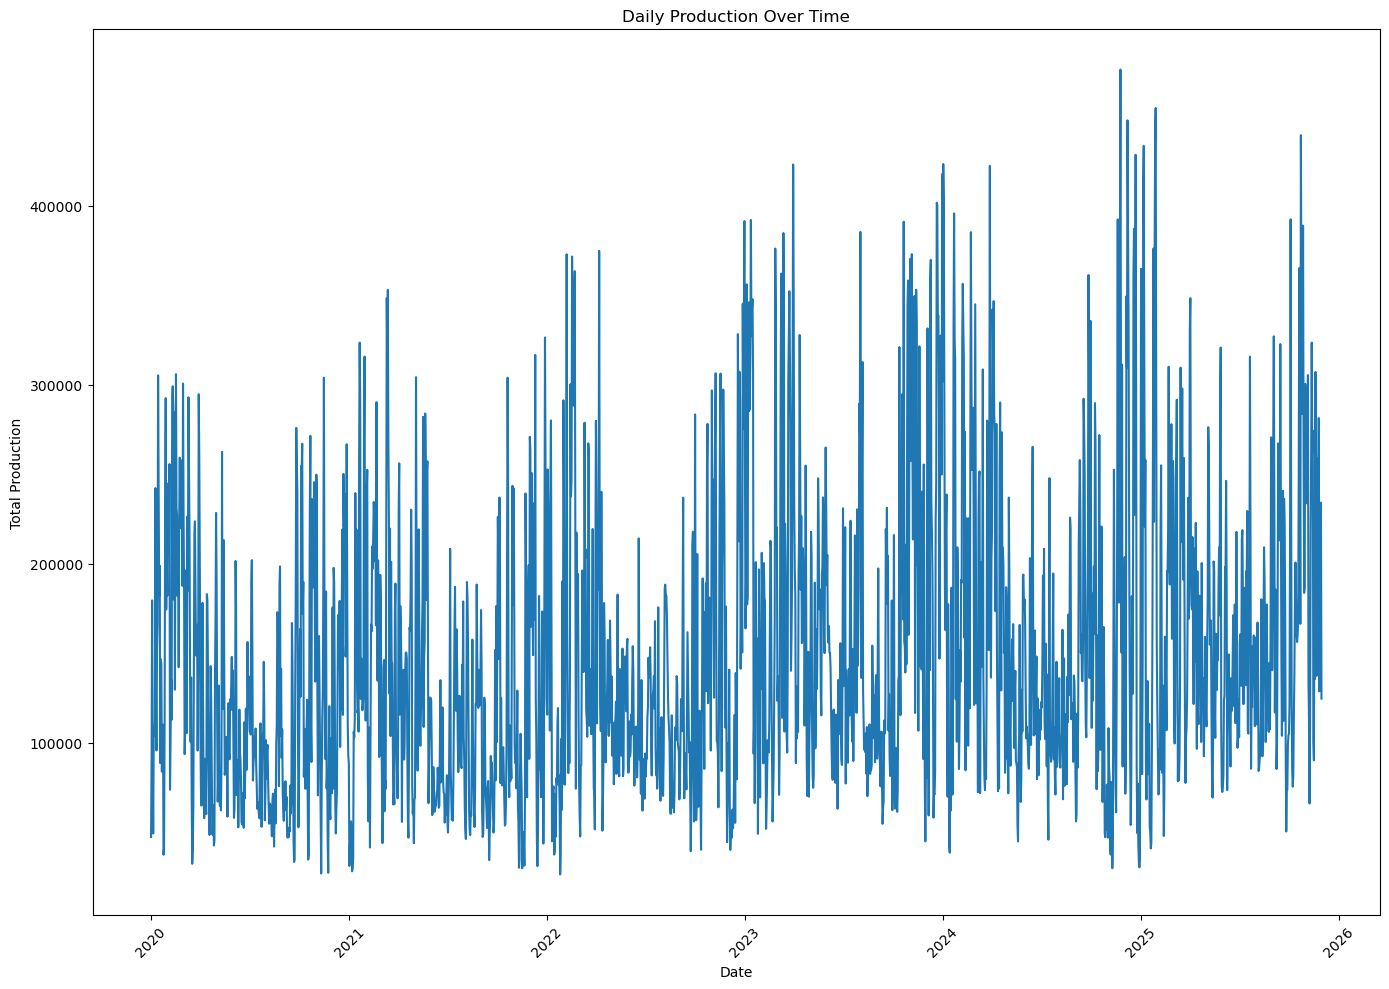

In [10]:
# Checking Production against Date 

import pandas as pd
import matplotlib.pyplot as plt

aeiou['Date'] = pd.to_datetime(aeiou['Date'])

daily_prod = aeiou.groupby('Date')['Production'].sum()

plt.figure(figsize = (14, 10))
plt.plot(daily_prod.index, daily_prod.values)

plt.title('Daily Production Over Time')
plt.xlabel('Date')
plt.ylabel('Total Production')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()



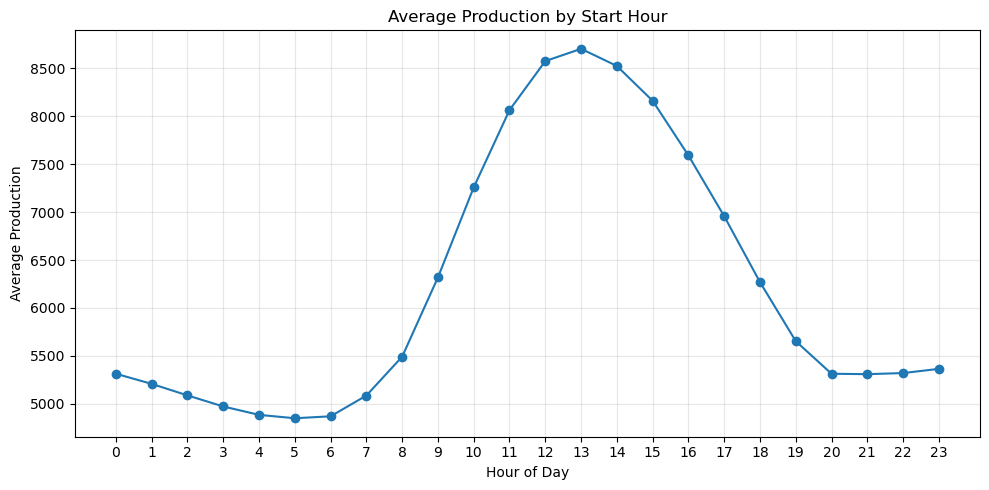

In [9]:
# Checking Production vs Start_Hour (hourly behavior)


hourly_prod = aeiou.groupby('Start_Hour')['Production'].mean()

plt.figure(figsize = (10, 5))
plt.plot(hourly_prod.index, hourly_prod.values, marker = 'o')

plt.title('Average Production by Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Production')
plt.xticks(range(0, 24))
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()


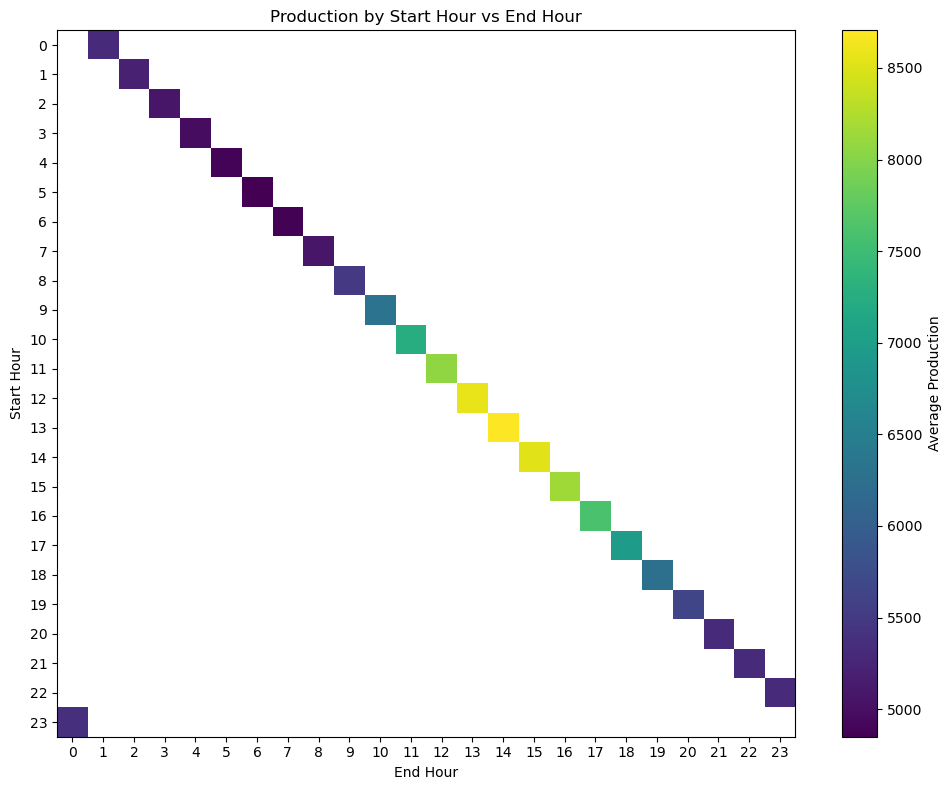

In [10]:
# Checking Start_Hour vs End_Hour

pivot_hours = pd.pivot_table( aeiou,
    values = 'Production',
    index = 'Start_Hour',
    columns = 'End_Hour',
    aggfunc = 'mean' )

plt.figure(figsize = (10, 8))
plt.imshow(pivot_hours, aspect = 'auto')
plt.colorbar(label = 'Average Production')

plt.title('Production by Start Hour vs End Hour')
plt.xlabel('End Hour')
plt.ylabel('Start Hour')
plt.xticks(range(len(pivot_hours.columns)), pivot_hours.columns)
plt.yticks(range(len(pivot_hours.index)), pivot_hours.index)
plt.tight_layout()
plt.show()


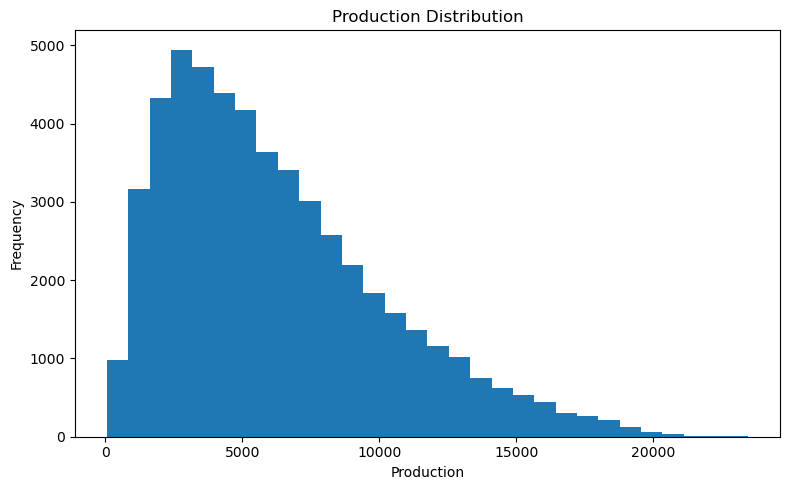

In [11]:
# Checking Production Outliers

plt.figure(figsize = (8, 5))
plt.hist(aeiou['Production'], bins = 30)

plt.title('Production Distribution')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


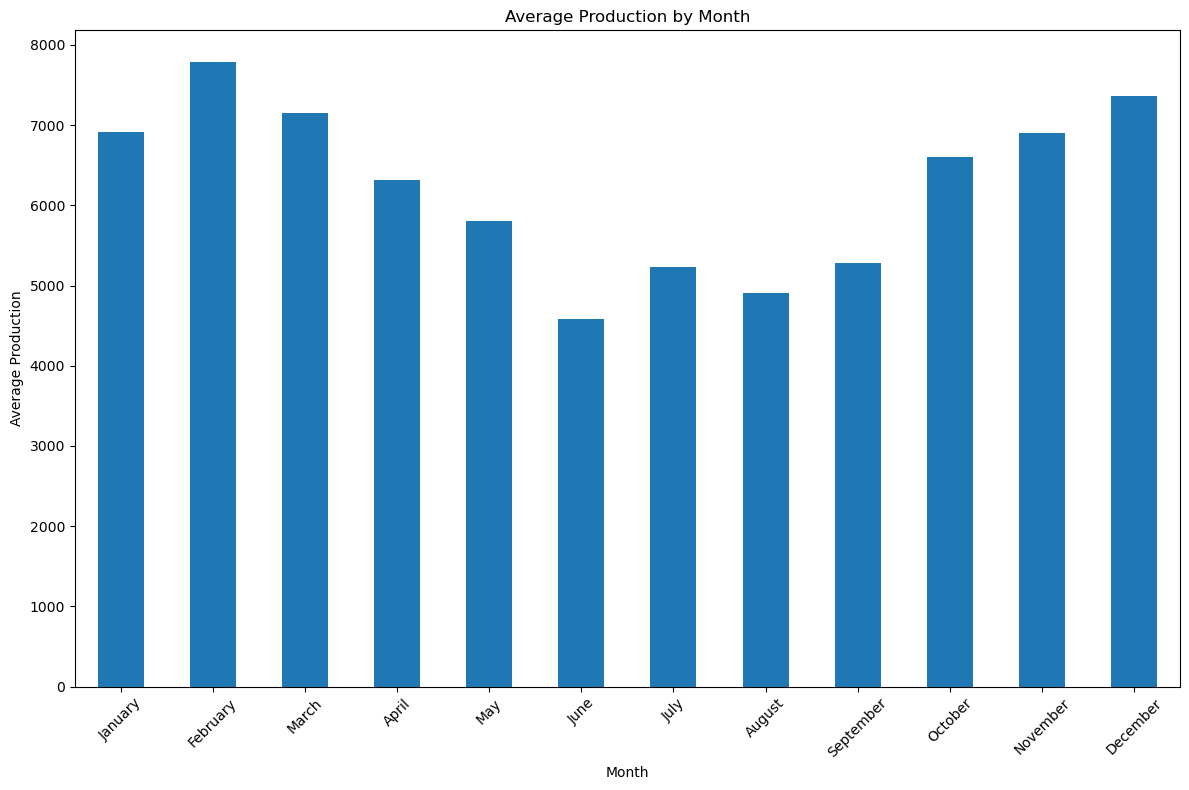

In [12]:
# Checking monthly production

month_order = [ 'January','February','March','April','May','June',
    'July','August','September','October','November','December' ]

aeiou['Month_Name'] = pd.Categorical(
    aeiou['Month_Name'],
    categories = month_order,
    ordered = True )

monthly_prod = aeiou.groupby('Month_Name', observed = False)['Production'].mean()

plt.figure(figsize = (12, 8))
monthly_prod.plot(kind = 'bar')

plt.title('Average Production by Month')
plt.xlabel('Month')
plt.ylabel('Average Production')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


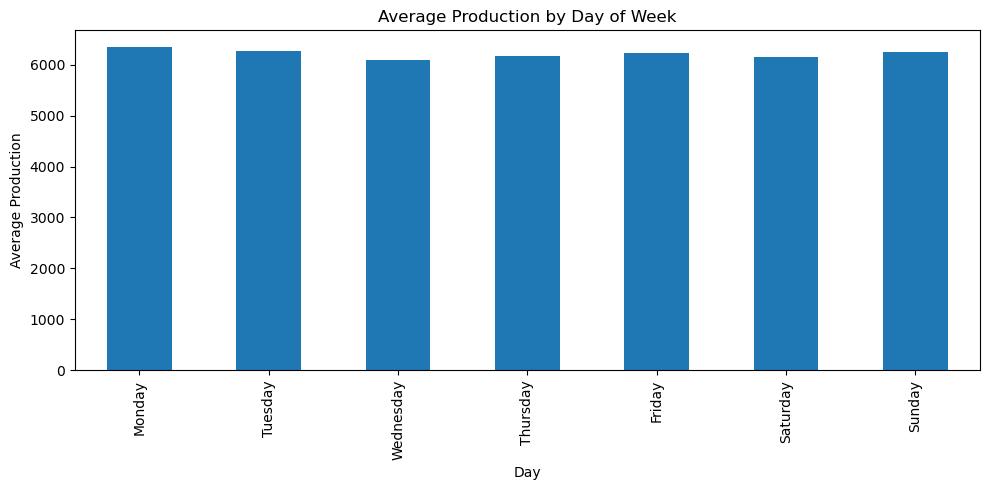

In [13]:
# Checking Production vs Day_Name (weekly cycle)

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

aeiou['Day_Name'] = pd.Categorical(
    aeiou['Day_Name'],
    categories = day_order,
    ordered = True )

weekly_prod = aeiou.groupby('Day_Name', observed = False)['Production'].mean()

plt.figure(figsize =(10, 5))
weekly_prod.plot(kind = 'bar')

plt.title('Average Production by Day of Week')
plt.xlabel('Day')
plt.ylabel('Average Production')
plt.tight_layout()
plt.show()


--- Random Forest Regression ---
Mean Absolute Error (MAE): 2039.20
Root Mean Squared Error (RMSE): 2751.60
R-squared (R2) Score: 0.5224

Top 10 Features:
               Feature  Importance
1          Day_of_Year        0.39
0           Start_Hour        0.23
3          Source_Wind        0.06
22       Season_Summer        0.05
2         Source_Solar        0.04
5   Day_Name_Wednesday        0.03
8    Day_Name_Saturday        0.03
6    Day_Name_Thursday        0.03
9      Day_Name_Sunday        0.03
7      Day_Name_Friday        0.03


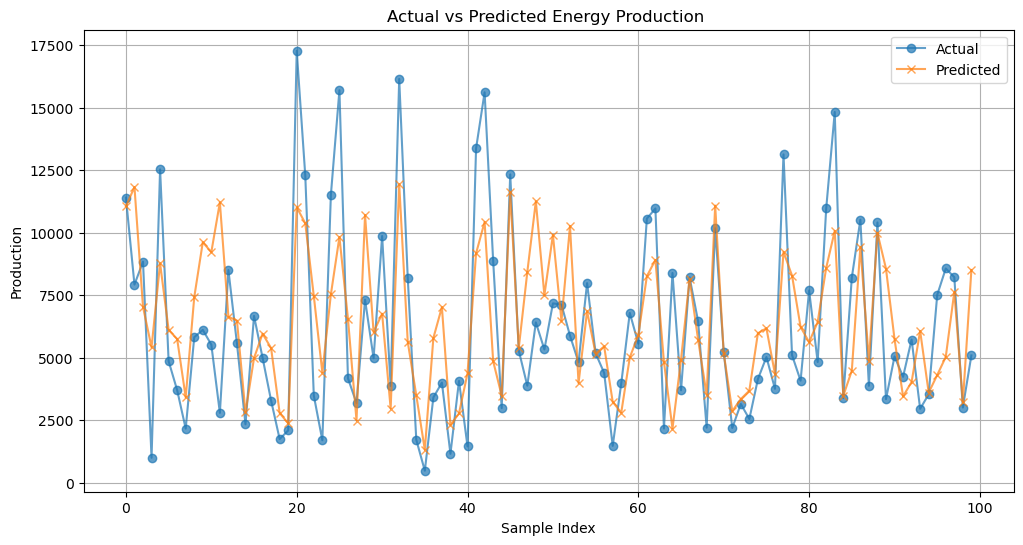

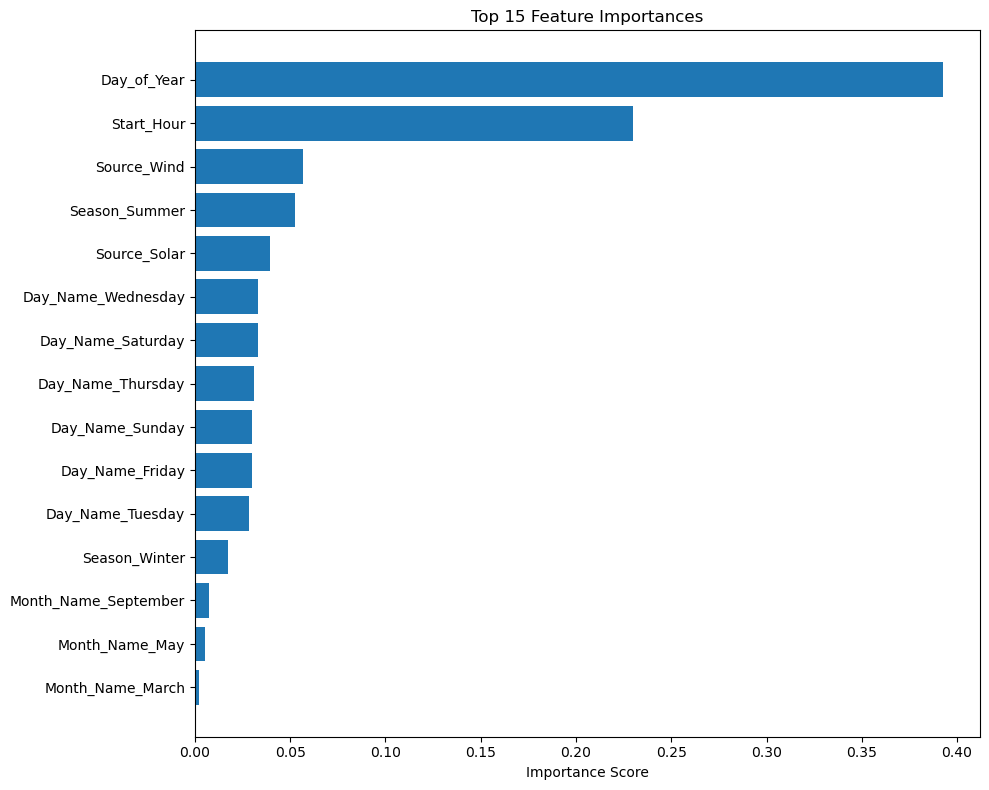

In [14]:
# Implement Random Forest Regression, for prediction, prediction and metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

print('--- Random Forest Regression ---')

# Select features and target
features = ['Start_Hour', 'Source', 'Day_of_Year', 'Day_Name', 'Month_Name', 'Season']
target = 'Production'

X = aeiou[features]
y = aeiou[target]

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns = ['Source', 'Day_Name', 'Month_Name', 'Season'], drop_first = True)

# Split the data 80:20

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

# Train Random Forest Regressor
# Using a limited number of estimators and depth for speed while maintaining accuracy

rf_model = RandomForestRegressor(n_estimators = 100, max_depth = 15, random_state = 42, n_jobs = -1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualization: Actual vs Predicted (Subset of 100 samples for clarity)
plt.figure(figsize = (12, 6))
plt.plot(y_test.values[:100], label = 'Actual', marker = 'o', alpha = 0.7)
plt.plot(y_pred[:100], label = 'Predicted', marker = 'x', alpha = 0.7)
plt.title('Actual vs Predicted Energy Production ')
plt.xlabel('Sample Index')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.savefig('rf_actual_vs_predicted.png')

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 8))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15])
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_feature_importance.png')

print('\nTop 10 Features:')
print(feature_importance_df.head(10))



--- K-means Clustering ---
Silhouette Score: 0.3064
Source          Mixed  Solar   Wind
KMeans_Cluster                     
0                   0   2115  14872
1                   0   1982   9405
2                   0   2017   7775
3                   2   3264  10432


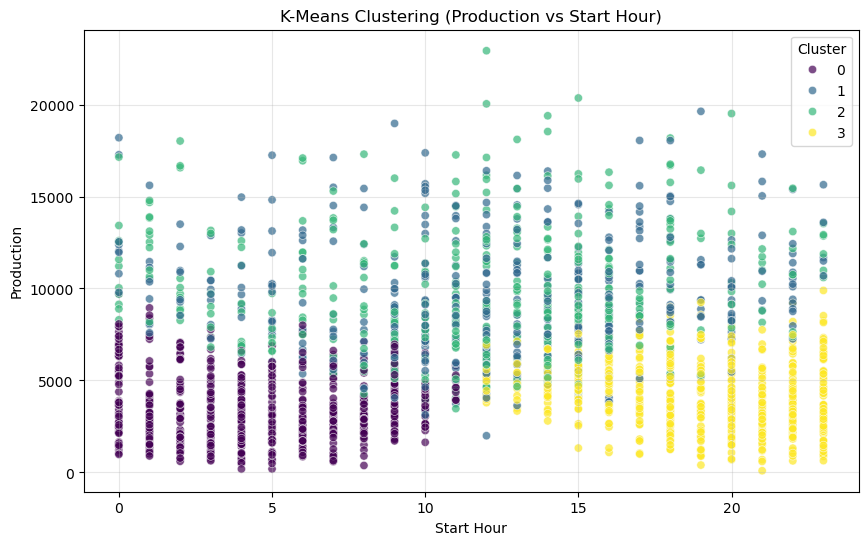

In [15]:
# Implement K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

print('\n--- K-means Clustering ---')


clust_features = ['Production', 'Start_Hour', 'Day_of_Year']
X_clust = aeiou[clust_features]

# Scaling dataset
clust_scaler = StandardScaler()
X_clust_scaled = clust_scaler.fit_transform(X_clust)

# Using a subset for clustering if necessary, but 50k is manageable for K-means
kmeans = KMeans(
    n_clusters = 4,
    random_state = 42,
    n_init = 10 )

aeiou['KMeans_Cluster'] = kmeans.fit_predict(X_clust_scaled)

sil_score = silhouette_score(X_clust_scaled, aeiou['KMeans_Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

# Print Clusters
cluster_source_ct = pd.crosstab(
    aeiou['KMeans_Cluster'],
    aeiou['Source'] )
print(cluster_source_ct)

# Plot the k-means
plt.figure(figsize = (10, 6))

sns.scatterplot(
    data = aeiou.sample(2000, random_state = 42),
    x = 'Start_Hour',
    y = 'Production',
    hue = 'KMeans_Cluster',
    palette = 'viridis',
    alpha = 0.7 )

plt.title('K-Means Clustering (Production vs Start Hour)')
plt.xlabel('Start Hour')
plt.ylabel('Production')
plt.legend(title = 'Cluster')
plt.grid(alpha = 0.3)
plt.show()



--- DBSCAN Clustering ---
Clusters found: 2
Noise points: 47 (0.94%)
Non-noise clusters: 1
Silhouette score not defined: less than 2 clusters after removing noise.


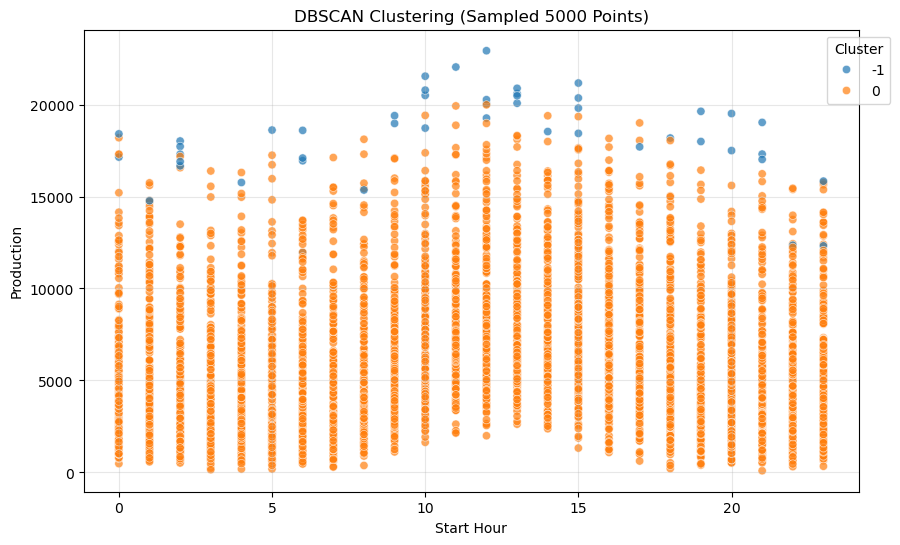

In [16]:
# Implement DBSCAN Clustering

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

print('\n--- DBSCAN Clustering ---')

# DBSCAN is computationally expensive on 50k points, so we'll sample 5000 points

aeiou_sample = aeiou.sample(5000, random_state = 42).copy()

dbscan_features = ['Production', 'Start_Hour', 'Day_of_Year']

dbscan_scaler = StandardScaler()
X_dbscan = dbscan_scaler.fit_transform(aeiou_sample[dbscan_features])

dbscan = DBSCAN(eps = 0.5, min_samples = 10)
aeiou_sample['DBSCAN_Cluster'] = dbscan.fit_predict(X_dbscan)

labels = aeiou_sample['DBSCAN_Cluster']

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print(f'Clusters found: {n_clusters}')
print(f'Noise points: {n_noise} ({n_noise / len(labels) * 100:.2f}%)')

# Checking Silhouette Score if it is valid

labels = aeiou_sample['DBSCAN_Cluster']

# Remove noise
mask = labels != -1
labels_no_noise = labels[mask]
X_no_noise = X_dbscan[mask]

n_clusters_no_noise = len(np.unique(labels_no_noise))

print(f'Non-noise clusters: {n_clusters_no_noise}')

if n_clusters_no_noise >= 2:
    sil_score = silhouette_score(X_no_noise, labels_no_noise)
    print(f'Silhouette Score (excluding noise): {sil_score:.4f}')
else:
    print('Silhouette score not defined: less than 2 clusters after removing noise.')

# Plot the DBSCAN

plt.figure(figsize = (10, 6))

sns.scatterplot(
    data = aeiou_sample,
    x = 'Start_Hour',
    y = 'Production',
    hue = 'DBSCAN_Cluster',
    palette = 'tab10',
    alpha = 0.7 )

plt.title('DBSCAN Clustering (Sampled 5000 Points)')
plt.xlabel('Start Hour')
plt.ylabel('Production')
plt.legend(title = 'Cluster', bbox_to_anchor = (1.05, 1))
plt.grid(alpha = 0.3)
plt.show()



--- Time Series Analysis ---


C:\ProgramData\anaconda3\envs\nakop\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\nakop\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\nakop\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\envs\nakop\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

3487.5051985752984 20025880.477729302 4475.028544906647 2958.806142982253


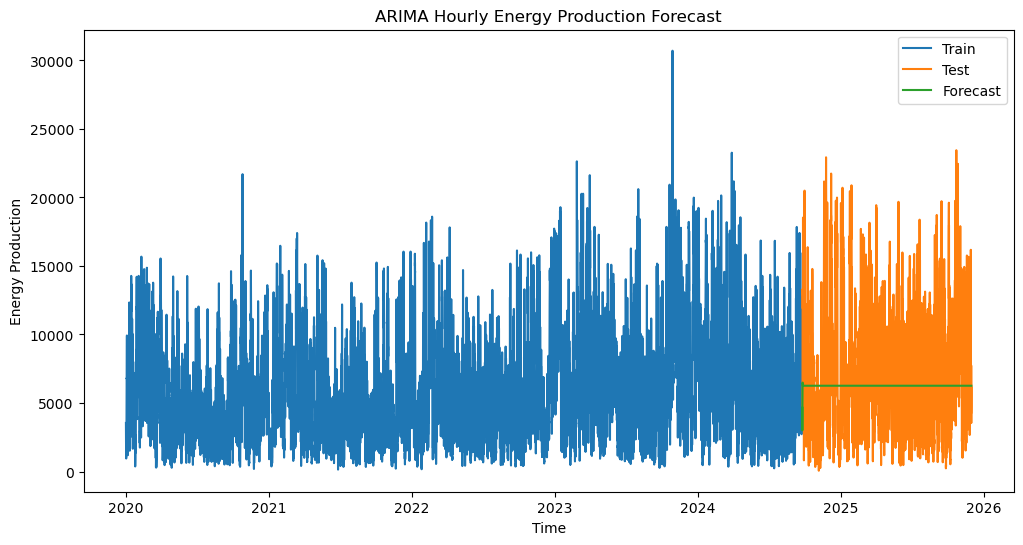

In [17]:
# Implement Times Series Analysis

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from statsmodels.tsa.arima.model import ARIMA


print('\n--- Time Series Analysis ---')

# Create datetime index
aeiou['Datetime'] = pd.to_datetime(aeiou['Date']) + pd.to_timedelta(aeiou['Start_Hour'], unit = 'h')

# Aggregate production per hour
ts = aeiou.groupby('Datetime')['Production'].sum().sort_index()

# Train-test split
split = int(len(ts) * 0.8)
train, test = ts.iloc[:split], ts.iloc[split:]

# Fit ARIMA model
model = ARIMA(train, order = (2,1,2))
fitted = model.fit()

# Forecast
forecast = fitted.forecast(steps = len(test))

# Metrics
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
medae = median_absolute_error(test, forecast)

print(mae, mse, rmse, medae)

plt.figure(figsize = (12,6))
plt.plot(train.index, train.values, label = 'Train')
plt.plot(test.index, test.values, label = 'Test')
plt.plot(test.index, forecast.values, label=  'Forecast')
plt.legend()
plt.title('ARIMA Hourly Energy Production Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Production')
plt.show()



--- TLSTM (Long Short-Term Memory) ---
Epoch 1/20


C:\ProgramData\anaconda3\envs\nakop\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0019
Epoch 2/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.1235e-04
Epoch 3/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.3857e-04
Epoch 4/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.2755e-04
Epoch 5/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.1757e-04
Epoch 6/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 3.1170e-04
Epoch 7/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9750e-04
Epoch 8/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9354e-04
Epoch 9/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.9223e-04
Epoch 10/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.8465e-04
Epoch 11/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.8143e-04
Epoch 12/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7689e-04
Epoch 13/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7280e-04
Epoch 14/20
648/648 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.7144e-04
Epoch 15/20
648/

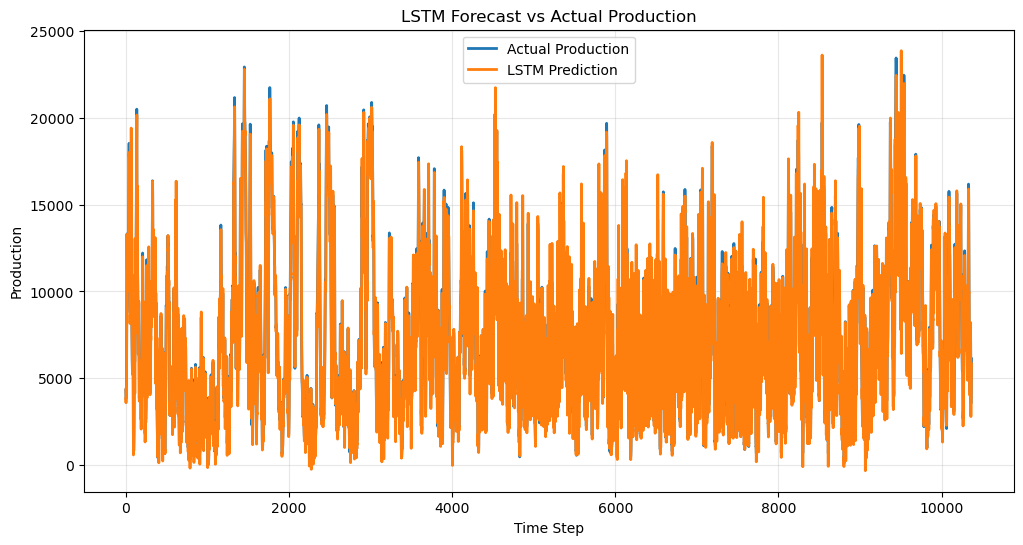

In [18]:
# Implement LSTM 

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

print('\n--- TLSTM (Long Short-Term Memory) ---')

aeiou['Datetime'] = pd.to_datetime(aeiou['Date']) + pd.to_timedelta(aeiou['Start_Hour'], unit = 'h')
ts = aeiou.groupby('Datetime')['Production'].sum().sort_index()

# Scale data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(ts.values.reshape(-1,1))

def create_sequences(data, window = 24):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, 24)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1)),
    Dense(1) ])

model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X_train, y_train, epochs = 20, batch_size = 64, verbose = 1)

# Forecast
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Metrics
mae = mean_absolute_error(y_test_actual, predictions)
mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test_actual, predictions)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('MedAE:', medae)

# Plot the training model

plt.figure(figsize=(12, 6))

plt.plot(y_test_actual, label = 'Actual Production', linewidth = 2)
plt.plot(predictions, label = 'LSTM Prediction', linewidth = 2)

plt.title('LSTM Forecast vs Actual Production')
plt.xlabel('Time Step')
plt.ylabel('Production')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

